In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score

In [2]:
# Load data
data = pd.read_csv(r"C:\Users\ashis\Desktop\Python\Dataset\customer_segmentation_data.csv")

# Inspect data
data.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


In [4]:
data.describe()

,id,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,43.783000,88500.800000,50.685000,5.46900,26.596000,492.348670
std,288.819436,15.042213,34230.771122,28.955175,2.85573,14.243654,295.744253
min,1.000000,18.000000,30004.000000,1.000000,1.00000,1.000000,10.400000
25%,250.750000,30.000000,57911.750000,26.000000,3.00000,15.000000,218.762500
50%,500.500000,45.000000,87845.500000,50.000000,5.00000,27.000000,491.595000
75%,750.250000,57.000000,116110.250000,76.000000,8.00000,39.000000,747.170000
max,1000.000000,69.000000,149973.000000,100.000000,10.00000,50.000000,999.740000


In [5]:
data.isnull().sum()

id                      0
age                     0
gender                  0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
dtype: int64

In [6]:
lab = LabelEncoder()
lab

LabelEncoder()

In [7]:
data['gender'] = lab.fit_transform(data['gender'])
data['preferred_category'] = lab.fit_transform(data['preferred_category'])

In [8]:
data.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,0,99342,90,3,24,2,113.53
1,2,21,0,78852,60,2,42,4,41.93
2,3,60,0,126573,30,2,28,0,424.36
3,4,40,2,47099,74,9,5,3,991.93
4,5,65,0,140621,21,3,25,1,347.08


In [9]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)

In [30]:
# Initialize DBSCAN with chosen eps and min_samples
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit and predict clusters
data['Cluster'] = dbscan.fit_predict(scaled_features)

Cluster
-1    1000
Name: count, dtype: int64


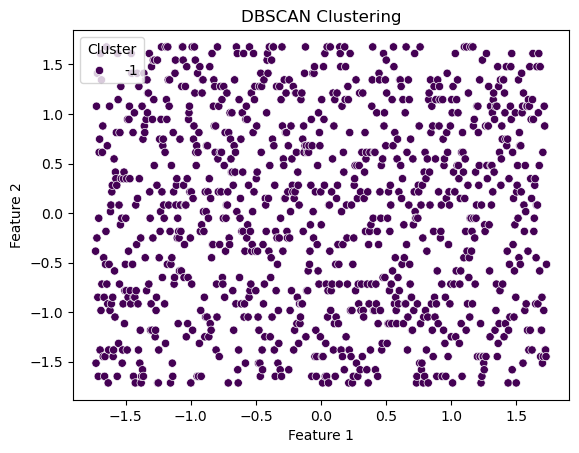

In [32]:
# Count of points in each cluster (-1 represents noise)
print(data['Cluster'].value_counts())

# Plot clusters
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=data['Cluster'], palette='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("DBSCAN Clustering")
plt.show()

In [34]:
from sklearn.metrics import silhouette_score

# Test different values for eps and min_samples
best_score = -1
best_params = {'eps': 0.5, 'min_samples': 5}

for eps in np.arange(0.3, 1.0, 0.1):
    for min_samples in range(3, 10):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(scaled_features)
        if len(set(labels)) > 1:  # Ensure more than one cluster is formed
            score = silhouette_score(scaled_features, labels)
            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples': min_samples}

print("Best params:", best_params)


Best params: {'eps': 0.5, 'min_samples': 5}
